In [1]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from googletrans import Translator


In [2]:
files = os.path.join("/*.csv")
files = glob.glob(files)
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.to_csv("combined_shopeeTH.csv")
df

,username,date,variation,rating,comment
0,sharpjakkaphan,2022-01-23 11:15:56,ขาว 5ชั้น,5.0,คุ้มค่ามาก วางในซอกที่แคบได้พอดี วางของได้เยอะ...
1,milkpummarin,2022-01-16 13:21:36,ขาว 5ชั้น,4.0,สั่ง30ติดปีใหม่แต่ก้ส่งเร็วยุ ได้วันที่4. แต่...
2,kamonwanyotchot,2021-12-16 14:39:15,ขาว 3ชั้น,5.0,สินค้าจัดส่งนานไปหน่อยค่ะ ยังไม่ได้ลองประกอบสิ...
3,oti346do0o,2021-09-05 19:25:25,ขาว 2ชั้น,4.0,ส่งไวค่ะ ขนส่งโทรแจ้งก่อน แต่แพคไม่ดีเลย กล่อง...
4,c*****m,2021-10-13 12:47:18,เทา 3ชั้น,4.0,การจัดส่งโอเค แต่กล่องมีรอยขาด2ที่ สินค้าไม่ได...
...,...,...,...,...,...
109560,_new_.,2021-11-14 15:02:10,DI06 (2K) Black,5.0,NaN
109561,eittipol1234,2021-11-17 22:34:59,DI22 FHD 2K,5.0,NaN
109562,weeraphong_k,2021-11-20 00:28:57,DI06 (2K) Black,5.0,NaN
109563,poloordinary,2021-10-24 02:48:59,DI01 (1080P),5.0,NaN


In [3]:
df = df.dropna()

In [4]:
df

,username,date,variation,rating,comment
0,sharpjakkaphan,2022-01-23 11:15:56,ขาว 5ชั้น,5.0,คุ้มค่ามาก วางในซอกที่แคบได้พอดี วางของได้เยอะ...
1,milkpummarin,2022-01-16 13:21:36,ขาว 5ชั้น,4.0,สั่ง30ติดปีใหม่แต่ก้ส่งเร็วยุ ได้วันที่4. แต่...
2,kamonwanyotchot,2021-12-16 14:39:15,ขาว 3ชั้น,5.0,สินค้าจัดส่งนานไปหน่อยค่ะ ยังไม่ได้ลองประกอบสิ...
3,oti346do0o,2021-09-05 19:25:25,ขาว 2ชั้น,4.0,ส่งไวค่ะ ขนส่งโทรแจ้งก่อน แต่แพคไม่ดีเลย กล่อง...
4,c*****m,2021-10-13 12:47:18,เทา 3ชั้น,4.0,การจัดส่งโอเค แต่กล่องมีรอยขาด2ที่ สินค้าไม่ได...
...,...,...,...,...,...
108653,fondue.studio,2021-05-10 01:17:58,DI01 (1080P),5.0,กล้องชัดดีค่ะ ใช้งานง่าย เหมาะสมกับราคา
108654,iam.chalat,2021-07-12 15:26:44,DI06 (2K),5.0,ส่งไวม๊าก
108655,ronnachaisnimaanta,2021-06-22 12:15:47,DI06 (2K),5.0,ส่งเร็วมากครับ👍👍
108656,bunchaph5548,2021-07-16 10:58:27,DI06 (2K),1.0,ผิดนัดการส่งของ ไม่มีความเป็นมืออาชีพ


In [5]:
df["translated text"] = df["comment"]

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_50403/183252566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["translated text"] = df["comment"]


In [6]:
#initialize the Translator
translator = Translator()
source_lan = "th" 
translated_to= "en" 

In [14]:
counter = 57874
for index, row in df[57874:].iterrows():  
    try:
        df['translated text'][index] = translator.translate(str(row['comment']), src=source_lan, dest = translated_to).text
        print(df['translated text'][index])
        counter += 1
        print(counter)
    except Exception as e:
        time.sleep(15)
        continue

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_50403/2017387040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['translated text'][index] = translator.translate(str(row['comment']), src=source_lan, dest = translated_to).text


Good product
57875
Well, worth it.
57876
Clear picture
57877
Received the product
57878
The picture is very clear.
57879
The camera is clearly sent.
57880
Good quality products, cheaper than others, of course, good quality products, cheaper than others, of course, good quality products, cheaper than others, of course.Good quality, cheaper than others, of course, good quality products, cheaper than others, of course, good quality products, cheaper than others, of course, good quality products.Cheaper
57881
The full picture is very good.
57882
Good product. Send a lot. Suitable for the price.
57883
Very clear.
57884
The camera has a little footprint but normal use.
57885
Products work wellThe transport is well wrapped as well.
57886
Get the correct delivery as ordered
57887
Extremely
57888
The camera is obviously installed and easy to use.
57889
The Product Is Quite Oh, Shipping is A But Slow
57890
Not clear, not worth it.
57891
The camera is clear, easy to use, easy to carry.
57892
Look

In [25]:
# df.to_csv('df1.csv')#save first just incase
df = pd.read_csv('df1.csv')

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df['Reviews'] = pd.DataFrame(df['translated text'].apply(clean_text_round1))
df

,Unnamed: 0,username,date,variation,rating,comment,translated text,Reviews
0,0,sharpjakkaphan,2022-01-23 11:15:56,ขาว 5ชั้น,5.0,คุ้มค่ามาก วางในซอกที่แคบได้พอดี วางของได้เยอะ...,"Very worthwhile, put in a narrow niche.Paste m...",worthwhile put narrow nichepaste morelooks str...
1,1,milkpummarin,2022-01-16 13:21:36,ขาว 5ชั้น,4.0,สั่ง30ติดปีใหม่แต่ก้ส่งเร็วยุ ได้วันที่4. แต่...,"Order 30 on the new year, but I can send the f...",order new year send faster day black stain wra...
2,2,kamonwanyotchot,2021-12-16 14:39:15,ขาว 3ชั้น,5.0,สินค้าจัดส่งนานไปหน่อยค่ะ ยังไม่ได้ลองประกอบสิ...,The product is delivered for a long time.Have ...,product delivered long timehave yet tried asse...
3,3,oti346do0o,2021-09-05 19:25:25,ขาว 2ชั้น,4.0,ส่งไวค่ะ ขนส่งโทรแจ้งก่อน แต่แพคไม่ดีเลย กล่อง...,"Send sensitive, transport, call firstBut the p...",send sensitive transport call firstbut pack go...
4,4,c*****m,2021-10-13 12:47:18,เทา 3ชั้น,4.0,การจัดส่งโอเค แต่กล่องมีรอยขาด2ที่ สินค้าไม่ได...,Delivery okBut the box has 2 deficiencyThe pro...,delivery okbut box deficiencythe product bubbl...
...,...,...,...,...,...,...,...,...
57915,108653,fondue.studio,2021-05-10 01:17:58,DI01 (1080P),5.0,กล้องชัดดีค่ะ ใช้งานง่าย เหมาะสมกับราคา,"The camera is clear, easy to use, suitable for...",camera clear easy use suitable price
57916,108654,iam.chalat,2021-07-12 15:26:44,DI06 (2K),5.0,ส่งไวม๊าก,Send Wai,send wai
57917,108655,ronnachaisnimaanta,2021-06-22 12:15:47,DI06 (2K),5.0,ส่งเร็วมากครับ👍👍,Very fast delivery 👍👍,fast delivery
57918,108656,bunchaph5548,2021-07-16 10:58:27,DI06 (2K),1.0,ผิดนัดการส่งของ ไม่มีความเป็นมืออาชีพ,Default deliveryNo professional,default deliveryno professional


In [43]:
def remove_url(removed_url):
    removed_url = removed_url.lower()
    removed_url = re.sub('[%s]' % re.escape(string.punctuation), '', removed_url)
    removed_url = re.sub('\w*\d\w*', '', removed_url)
    return removed_url
df['Reviews'] = pd.DataFrame(df['Reviews'].apply(remove_url))

df

,Unnamed: 0,username,date,variation,rating,comment,translated text,Reviews
0,0,sharpjakkaphan,2022-01-23 11:15:56,ขาว 5ชั้น,5.0,คุ้มค่ามาก วางในซอกที่แคบได้พอดี วางของได้เยอะ...,"Very worthwhile, put in a narrow niche.Paste m...",worthwhile put narrow nichepaste morelooks str...
1,1,milkpummarin,2022-01-16 13:21:36,ขาว 5ชั้น,4.0,สั่ง30ติดปีใหม่แต่ก้ส่งเร็วยุ ได้วันที่4. แต่...,"Order 30 on the new year, but I can send the f...",order new year send faster day black stain wra...
2,2,kamonwanyotchot,2021-12-16 14:39:15,ขาว 3ชั้น,5.0,สินค้าจัดส่งนานไปหน่อยค่ะ ยังไม่ได้ลองประกอบสิ...,The product is delivered for a long time.Have ...,product delivered long timehave yet tried asse...
3,3,oti346do0o,2021-09-05 19:25:25,ขาว 2ชั้น,4.0,ส่งไวค่ะ ขนส่งโทรแจ้งก่อน แต่แพคไม่ดีเลย กล่อง...,"Send sensitive, transport, call firstBut the p...",send sensitive transport call firstbut pack go...
4,4,c*****m,2021-10-13 12:47:18,เทา 3ชั้น,4.0,การจัดส่งโอเค แต่กล่องมีรอยขาด2ที่ สินค้าไม่ได...,Delivery okBut the box has 2 deficiencyThe pro...,delivery okbut box deficiencythe product bubbl...
...,...,...,...,...,...,...,...,...
57915,108653,fondue.studio,2021-05-10 01:17:58,DI01 (1080P),5.0,กล้องชัดดีค่ะ ใช้งานง่าย เหมาะสมกับราคา,"The camera is clear, easy to use, suitable for...",camera clear easy use suitable price
57916,108654,iam.chalat,2021-07-12 15:26:44,DI06 (2K),5.0,ส่งไวม๊าก,Send Wai,send wai
57917,108655,ronnachaisnimaanta,2021-06-22 12:15:47,DI06 (2K),5.0,ส่งเร็วมากครับ👍👍,Very fast delivery 👍👍,fast delivery
57918,108656,bunchaph5548,2021-07-16 10:58:27,DI06 (2K),1.0,ผิดนัดการส่งของ ไม่มีความเป็นมืออาชีพ,Default deliveryNo professional,default deliveryno professional


In [44]:
df['Reviews'] = df['Reviews'].str.replace('\n',' ')
df

,Unnamed: 0,username,date,variation,rating,comment,translated text,Reviews
0,0,sharpjakkaphan,2022-01-23 11:15:56,ขาว 5ชั้น,5.0,คุ้มค่ามาก วางในซอกที่แคบได้พอดี วางของได้เยอะ...,"Very worthwhile, put in a narrow niche.Paste m...",worthwhile put narrow nichepaste morelooks str...
1,1,milkpummarin,2022-01-16 13:21:36,ขาว 5ชั้น,4.0,สั่ง30ติดปีใหม่แต่ก้ส่งเร็วยุ ได้วันที่4. แต่...,"Order 30 on the new year, but I can send the f...",order new year send faster day black stain wra...
2,2,kamonwanyotchot,2021-12-16 14:39:15,ขาว 3ชั้น,5.0,สินค้าจัดส่งนานไปหน่อยค่ะ ยังไม่ได้ลองประกอบสิ...,The product is delivered for a long time.Have ...,product delivered long timehave yet tried asse...
3,3,oti346do0o,2021-09-05 19:25:25,ขาว 2ชั้น,4.0,ส่งไวค่ะ ขนส่งโทรแจ้งก่อน แต่แพคไม่ดีเลย กล่อง...,"Send sensitive, transport, call firstBut the p...",send sensitive transport call firstbut pack go...
4,4,c*****m,2021-10-13 12:47:18,เทา 3ชั้น,4.0,การจัดส่งโอเค แต่กล่องมีรอยขาด2ที่ สินค้าไม่ได...,Delivery okBut the box has 2 deficiencyThe pro...,delivery okbut box deficiencythe product bubbl...
...,...,...,...,...,...,...,...,...
57915,108653,fondue.studio,2021-05-10 01:17:58,DI01 (1080P),5.0,กล้องชัดดีค่ะ ใช้งานง่าย เหมาะสมกับราคา,"The camera is clear, easy to use, suitable for...",camera clear easy use suitable price
57916,108654,iam.chalat,2021-07-12 15:26:44,DI06 (2K),5.0,ส่งไวม๊าก,Send Wai,send wai
57917,108655,ronnachaisnimaanta,2021-06-22 12:15:47,DI06 (2K),5.0,ส่งเร็วมากครับ👍👍,Very fast delivery 👍👍,fast delivery
57918,108656,bunchaph5548,2021-07-16 10:58:27,DI06 (2K),1.0,ผิดนัดการส่งของ ไม่มีความเป็นมืออาชีพ,Default deliveryNo professional,default deliveryno professional


In [45]:
column_titles = ['date','rating','Reviews']
df1 = df.reindex(columns=column_titles)
df1

,date,rating,Reviews
0,2022-01-23 11:15:56,5.0,worthwhile put narrow nichepaste morelooks str...
1,2022-01-16 13:21:36,4.0,order new year send faster day black stain wra...
2,2021-12-16 14:39:15,5.0,product delivered long timehave yet tried asse...
3,2021-09-05 19:25:25,4.0,send sensitive transport call firstbut pack go...
4,2021-10-13 12:47:18,4.0,delivery okbut box deficiencythe product bubbl...
...,...,...,...
57915,2021-05-10 01:17:58,5.0,camera clear easy use suitable price
57916,2021-07-12 15:26:44,5.0,send wai
57917,2021-06-22 12:15:47,5.0,fast delivery
57918,2021-07-16 10:58:27,1.0,default deliveryno professional


In [46]:
df1['year'] = df1['date'].str.split(' ').str[0].str.split('-').str[0]
df1['month'] = df1['date'].str.split(' ').str[0].str.split('-').str[1]
df1.drop(['date'], axis =1)

,rating,Reviews,year,month
0,5.0,worthwhile put narrow nichepaste morelooks str...,2022,01
1,4.0,order new year send faster day black stain wra...,2022,01
2,5.0,product delivered long timehave yet tried asse...,2021,12
3,4.0,send sensitive transport call firstbut pack go...,2021,09
4,4.0,delivery okbut box deficiencythe product bubbl...,2021,10
...,...,...,...,...
57915,5.0,camera clear easy use suitable price,2021,05
57916,5.0,send wai,2021,07
57917,5.0,fast delivery,2021,06
57918,1.0,default deliveryno professional,2021,07


In [47]:
df_month = df1.groupby(by=['month']).count()
df_month
#to see which month have the most num of reveiws about SLOW delivery 

,date,rating,Reviews,year
month,,,,
01,5917,5917,5917,5917
02,6674,6674,6674,6674
03,7716,7716,7716,7716
04,1932,1932,1932,1932
05,2614,2614,2614,2614
06,2990,2990,2990,2990
07,3571,3571,3571,3571
08,4780,4780,4780,4780
09,5844,5844,5844,5844


In [48]:
#sentiment analysis 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df1['Review_lemma'] = pd.DataFrame(df1['Reviews'].apply(clean_text_round2))

In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df1['Sentiment score'] = pd.DataFrame(df1['Review_lemma'].apply(sentiment_scores))

In [50]:
column_titles = ['year','month','rating','Reviews','Sentiment score']
df1 = df1.reindex(columns=column_titles)
df1

,year,month,rating,Reviews,Sentiment score
0,2022,01,5.0,worthwhile put narrow nichepaste morelooks str...,Positive
1,2022,01,4.0,order new year send faster day black stain wra...,Positive
2,2021,12,5.0,product delivered long timehave yet tried asse...,Neutral
3,2021,09,4.0,send sensitive transport call firstbut pack go...,Positive
4,2021,10,4.0,delivery okbut box deficiencythe product bubbl...,Negative
...,...,...,...,...,...
57915,2021,05,5.0,camera clear easy use suitable price,Positive
57916,2021,07,5.0,send wai,Neutral
57917,2021,06,5.0,fast delivery,Neutral
57918,2021,07,1.0,default deliveryno professional,Neutral


In [51]:
df1.to_csv('shopee_th_results.csv')

In [52]:
df_neg = df1.drop(df1[df1['Sentiment score'] != 'Negative'].index)
df_neg

,year,month,rating,Reviews,Sentiment score
4,2021,10,4.0,delivery okbut box deficiencythe product bubbl...,Negative
13,2021,10,4.0,well lets deduct wheel point difficult,Negative
38,2021,10,5.0,send quality price together difficult may stro...,Negative
39,2021,09,4.0,choose wrong delivery thatso goesthe second ro...,Negative
83,2021,11,5.0,come cheap priceand send fastfast shocked orde...,Negative
...,...,...,...,...,...
57653,2021,07,5.0,sent fast like angry cameintroduce shop,Negative
57700,2021,08,5.0,tired,Negative
57835,2021,07,4.0,broken star box inside,Negative
57858,2021,05,5.0,wfh used meeting problem,Negative


In [53]:
cloud_string = df_neg['Reviews'].str.cat(sep=' ')

In [54]:
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('product', 1777),
 ('fast', 683),
 ('shop', 679),
 ('damaged', 652),
 ('delivery', 631),
 ('good', 611),
 ('received', 566),
 ('price', 484),
 ('order', 413),
 ('broken', 412),
 ('use', 390),
 ('send', 376),
 ('damage', 364),
 ('box', 353),
 ('products', 352),
 ('problem', 337),
 ('quality', 321),
 ('pack', 295),
 ('time', 273),
 ('well', 273),
 ('little', 251),
 ('used', 248),
 ('ordered', 243),
 ('sensitive', 228),
 ('cheap', 215),
 ('bad', 211),
 ('lot', 197),
 ('buy', 195),
 ('difficult', 190),
 ('long', 188),
 ('try', 187),
 ('color', 185),
 ('first', 180),
 ('dont', 180),
 ('get', 176),
 ('like', 169),
 ('star', 165),
 ('transport', 163),
 ('complete', 159),
 ('day', 158),
 ('sent', 158),
 ('soft', 158),
 ('according', 154),
 ('wrong', 153),
 ('delivered', 152),
 ('disappointed', 148),
 ('quite', 145),
 ('days', 137),
 ('know', 135),
 ('much', 133),
 ('wrapped', 132),
 ('new', 132),
 ('considered', 128),
 ('transportation', 125),
 ('machine', 125),
 ('ok', 124),
 ('slow', 122),

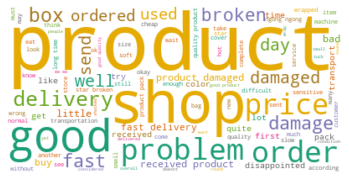

In [55]:
add_stop_words = ['...' , 'package', 'even', 'use','call','one','though', 'didnt', 'dont', 'hasnt', 'c',]
stop_words = add_stop_words + stop 
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

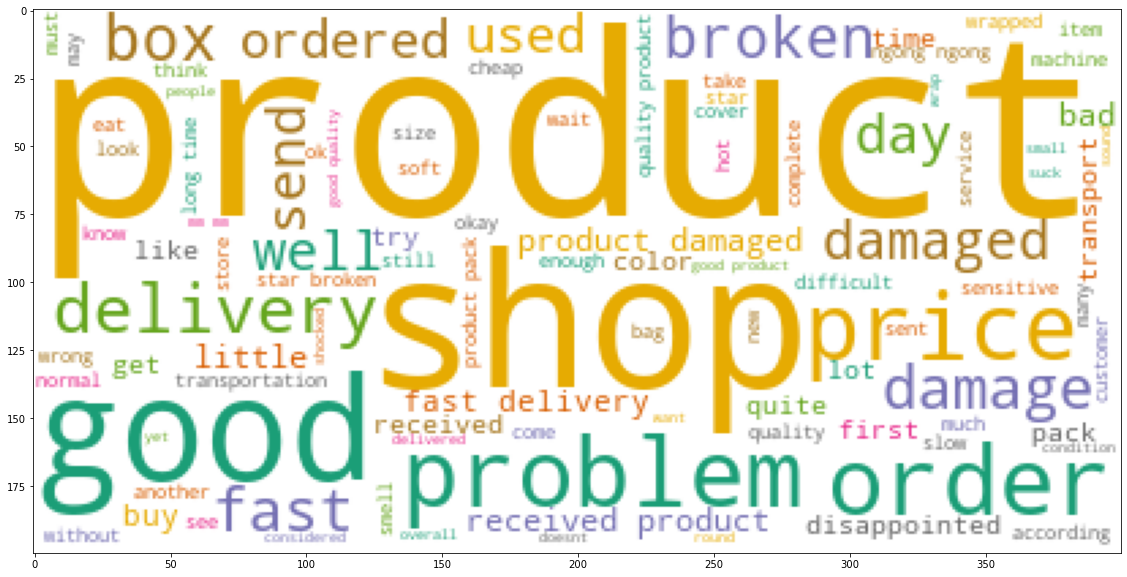

In [56]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [57]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['Reviews'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'Reviews':'Late reviews'})

In [58]:
column_titles = ['rating','Reviews','Sentiment']
df_late = df_late.reindex(columns=column_titles)
df_late

,rating,Reviews,Sentiment
116,5.0,NaN,NaN
535,5.0,NaN,NaN
656,1.0,NaN,NaN
690,5.0,NaN,NaN
762,4.0,NaN,NaN
...,...,...,...
56586,5.0,NaN,NaN
56659,2.0,NaN,NaN
56798,5.0,NaN,NaN
57326,2.0,NaN,NaN


In [59]:
df_late.to_csv('Late_reviews_shopeeTH.csv')